In [1]:
import glob
import time
import timeit
import pickle
import requests
import json
import re
import numpy as np
import pandas as pd
from multiprocessing import Pool
from matplotlib import pyplot as plt
from zipfile import ZipFile
import lxml.etree as etree
import xmlschema
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import combinations
from matplotlib.patches import Patch
import distinctipy

# If 'get_career' is a custom module you've created, keep this import

# Define 'toc' function once
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)

# Record start time
start_time = timeit.default_timer()
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.gridspec as gridspec

import math
import requests
from bs4 import BeautifulSoup
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.transforms as mtransforms
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_context('talk')#, font_scale=1.5)
mpl.rcParams.update({'text.usetex': False})
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
path_career='/mnt/sdb1/sandeep/000game_dev/'
path_data='/mnt/sdb1/sandeep/000game_dev/data/'

# GB_INLCUDED_OR_NOT='GB_NOT_INCLUDED'

In [2]:
with open(path_data+'small_teams.pkl', 'rb') as f:
    small_teams=pickle.load(f)

In [266]:
def calculate_shared_credits(rcredits):
        # Extract unique credits for each member
        unique_credits = {k: set(v) for k, v in rcredits.items()}

        # Calculate shared credits
        shared_credits = {}
        for (member1, credits1), (member2, credits2) in combinations(unique_credits.items(), 2):
            shared = credits1.intersection(credits2)
            shared_credits[(member1, member2)] = len(shared)-1

        return shared_credits
def create_network(shared_credits,MIN_FILTER_COLLABS):
    G = nx.Graph()

    # Add edges with weights
    for (member1, member2), weight in shared_credits.items():
        if weight >=MIN_FILTER_COLLABS:  # Add an edge only if there are shared credits
            G.add_edge(member1, member2, weight=weight)
    return G
import matplotlib.patheffects as PathEffects


def build_and_plot_network(ax,person_to_role, role_to_color,iterations_,MIN_FILTER_COLLABS):


    # Build the network
#     G = nx.Graph()
    G = create_network(shared_credits,MIN_FILTER_COLLABS)
    for person in person_to_role:
        G.add_node(person, role=person_to_role[person])
    nodes=list(G.nodes())
    for node in nodes:
        if node not in person_to_role.keys():
            G.remove_node(node)
    # Apply colors to nodes based on roles
    node_colors = [role_to_color[person_to_role[node]] for node in G.nodes()]
    noddesize = [role_to_size[person_to_role[node]] for node in G.nodes()]
    node_colorsdict = {node:role_to_color[person_to_role[node]] for node in G.nodes()}


    # Plot the network
    pos = nx.spring_layout(G, k=nodedistance, iterations=iterations_)
#     nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color="gray")

    # Edges
    weights = [(G[u][v]['weight']/17)**.8 for u, v in G.edges()]
    for u, v in G.edges():
        G[u][v]['weight_plot']=(G[u][v]['weight']/20)**.95
#     nx.draw_networkx_edges(G, pos, alpha=0.5, width=weights,connectionstyle="arc2,rad=.4")
    for edge in G.edges():
        source, target = edge
        rad = 0.2
        arrowprops=dict(lw=G.edges[(source,target)]['weight_plot'],arrowstyle="-",color='black',
                        connectionstyle=f"arc3,rad={rad}",
                        linestyle= '-',alpha=0.2)
        plt.annotate("",xy=pos[source],xytext=pos[target],arrowprops=arrowprops)
    # Nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors,alpha=.5,node_size=noddesize)    
    # Label roles at centroids
    role_positions = {role: np.mean([pos[node] for node in G if person_to_role[node] == role], axis=0) 
                      for role in roles_data.keys()}
    role_colors = {role: [node_colorsdict[node] for node in G if person_to_role[node] == role]
                      for role in roles_data.keys()}
    role_colors = {role: role_colors[role][0] if len(role_colors[role])>0 else [0,0,0]
                      for role in role_colors.keys()}
    for role, position in role_positions.items():
        col=role_colors[role]
    #     print(position,role)
        if str(position)!='nan':
            text=plt.text(position[0], position[1], role, fontsize=(30*role_to_size[role]/np.max(list(role_to_size.values())))**.3, ha='center', va='center',color=col,alpha=.7)
            text.set_path_effects([PathEffects.withStroke(linewidth=.3, foreground='white')])
    game_pretty=game.split('/')[-4].replace('-',' ').capitalize()

    plt.title(game_pretty+": Who worked with who before? On how many games?", fontsize=ff)
    legend_handles = [Patch(color=role_to_color[role], label=role) for role in unique_roles]
#     plt.legend(handles=legend_handles,bbox_to_anchor=[1,1,], loc='upper left', title='Roles', fontsize=ff-6,ncol=2)

#     plt.show()
    plt.axis('off')
    
    
def hrcredits(soup_credits,creditlinks):
    #___________________________________________________
    hcredits=[];rcredits={}
    # creditlinks[0]
    for soup_credit,p in zip(soup_credits,creditlinks):
        td_elements = soup_credit.find_all('td')
        td_elements
        # Find all <a> tags within this <td> element
        hcredit=[];rcredit=[]
        for td_element in td_elements:
            a_tags = td_element.find_all('a')
        # Extract the hrefs from each <a> tag
            hcredit.append([a.get('href') for a in a_tags])
            rcredit.append(td_element.get_text().strip())
        hcredits.append(hcredit);rcredits[p]=(rcredit);
    return hcredits,rcredits

# Plot Past collab network for a game

https://www.mobygames.com/game/9354/wolfenstein-enemy-territory/credits/windows/
84


/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


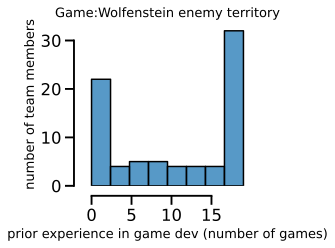

In [267]:

it=0
GAME_FOCUS=51
game=list(small_teams.keys())[GAME_FOCUS]
game_pretty=game.split('/')[-4].replace('-',' ').capitalize()

Roles = small_teams[game]
# for game,Roles in small_teams.items():

it+=1;print(it,it/len(small_teams.items()),end='\r')
roles=list(Roles.values())
if len(roles)>0:
    members=np.concatenate(roles)
else:
    members=[]
print(game)
#_________________________________________
#_________________________________________
creditlinks = members.copy()
with open(path_data+'PriorCreditsSoup_'+game.split('/')[-4]+'.pkl', 'rb') as f:
    soup_credits=pickle.load(f)
soup_credits = [BeautifulSoup(x, 'html.parser') for x in soup_credits] 

print(len(soup_credits))
if len(soup_credits)>0:

    hcredits,rcredits=hrcredits(soup_credits,creditlinks)
    import networkx as nx
    import matplotlib.pyplot as plt
    from itertools import combinations
    # with open(path_career+'soup_credit_'+url.split('/')[-4]+'.pkl', 'wb') as f:
    #     pickle.dump(soup_credit, f)
    #___________________________________________________

    PriorWorkExp_=np.array([len(rcredits[x][0:-1:2])-1 for x in rcredits.keys()])
    PriorRoles_careers=np.array([len(rcredits[x][1:len(rcredits[x]):2])-1 for x in rcredits.keys()])

    df = pd.DataFrame(PriorWorkExp_)
    df.columns=['prior experience in game dev (number of games)']
    # Custom colors

    # Creating the bar chart
    ff = 13
    aa=3; bb=3; wspace_=0.5; hspace_=0.3
    fig = plt.figure(figsize=(aa, bb))
    spec = gridspec.GridSpec(ncols=1, nrows=1, width_ratios=[1], wspace=wspace_, hspace=hspace_, height_ratios=[1])

    # Figure
    ax = fig.add_subplot(spec[0])
    ax = sns.histplot(x='prior experience in game dev (number of games)', data=df)
    plt.xticks([0,5,10,15])
    plt.ylabel('number of team members', fontsize=ff)
    plt.xlabel("prior experience in game dev (number of games)", fontsize=ff)
    plt.title("Game:"+game_pretty, fontsize=ff)
    # plt.ylim(0, max(df['Percentage']) + 5)
    sns.despine(offset=10, trim=True)

    # plt.savefig(path_data+'00_'+game.split('/')[-4]+" Prior Exp"+str(MIN_FILTER_COLLABS)+".svg",dpi=500, bbox_inches = "tight")
#     plt.savefig(path_data+'00_'+game.split('/')[-4].replace('-',' ').capitalize()+" Prior Exp"+str(MIN_FILTER_COLLABS)+".pdf",dpi=500, bbox_inches = "tight")
    #___________________________________________________

    # Assuming you have the roles data structured as mentioned
    roles_data = Roles.copy()
    roles_data={k:roles_data[k] for k in roles_data.keys() if len(roles_data[k])>0}

    # Create a list of unique roles
    unique_roles = list(roles_data.keys())

    # Assign a unique color to each role
    colors = list(mcolors.CSS4_COLORS.values())  # Using CSS4 colors
    role_to_color = dict(zip(unique_roles, distinctipy.get_colors(len(unique_roles))))

    # Reverse mapping from person to role and count roles
    person_to_role = {}
    role_counts = {}
    for role, persons in roles_data.items():
        role_counts[role] = len(persons)
    for role, persons in roles_data.items():
        for person in persons:
            if person not in person_to_role.keys():
                person_to_role[person] = role
            elif role_counts[person_to_role[person]]>role_counts[role]:
                person_to_role[person] = role

    # Calculate inverse role frequencies for node sizes
    max_count = max(role_counts.values())
    role_to_size = {role: (40*max_count / count)**.8 if count>0 else 0 for role, count in role_counts.items()}



    shared_credits=calculate_shared_credits(rcredits)

    # Build and plot the network
    nodedistance=.5
    iterations_=30
    ff = 13
    aa=12; bb=12; wspace_=0.5; hspace_=0.3
    fig = plt.figure(figsize=(aa, bb))
    spec = gridspec.GridSpec(ncols=2, nrows=2, width_ratios=[1,1], wspace=wspace_, hspace=hspace_, height_ratios=[1,1])

    # Figure
    for it in range(4):
        ax = fig.add_subplot(spec[it])
        MIN_FILTER_COLLABS=it+1

        build_and_plot_network(ax,person_to_role, role_to_color,iterations_,MIN_FILTER_COLLABS)
    plt.title('Series: Unravelling a game development team\n'+game_pretty)
#         plt.savefig(path_data+'00_'+game.split('/')[-4]+" Prior Collabs"+str(MIN_FILTER_COLLABS)+".svg",dpi=500, bbox_inches = "tight")
#         plt.savefig(path_data+'00_'+game.split('/')[-4]+" Prior Collabs"+str(MIN_FILTER_COLLABS)+".pdf",dpi=500, bbox_inches = "tight")
#         plt.close()
    

# Metacritic pages for small team games

In [86]:
MetaCriticUrls=[]
for game,Roles in small_teams.items():
#     print(game.split('credits')[0])
    name=game.split('/')[5]
    name.replace(" ", "-")

    MetaCriticUrls.append('https://www.metacritic.com/game/'+name+'/user-reviews/')    

total_urls = len(MetaCriticUrls)

In [89]:
from concurrent.futures import ThreadPoolExecutor, as_completed
import time


def fetch_and_parse_url(url):
    """
    Fetches the content of the given URL and parses it with BeautifulSoup.
    Returns a BeautifulSoup object or None if the request fails.
    """
    headermap = {"User-Agent": "Mac Firefox"};  
    response = requests.get(url, headers=headermap)
#     response = requests.get(url)
    if response.status_code == 200:
        return url,BeautifulSoup(response.content, 'html.parser')
    else:
        print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
        return url, None

# Function to process a batch of URLs
def process_batch(urls):
    global processed_urls
    with ThreadPoolExecutor(max_workers=5) as executor:
        future_to_url = {executor.submit(fetch_and_parse_url, url): url for url in urls}

        for future in as_completed(future_to_url):
            if future.result() is not None:
                url, soup = future.result()
            processed_urls += 1
            if soup:
                soupMetaCritic_dict[url] = soup  # Store in dictionary with URL as key
            print(f"Processed {processed_urls}/{total_urls} URLs", end='\r')



In [90]:
# game_links_batches
# # soup=fetch_and_parse_url('https://opencritic.com/game/9136/baldurs-gate-3')
# soup=fetch_and_parse_url(MetaCriticUrls[0])

In [91]:

# Split game_links into smaller lists of 50 links
batch_size = 50
game_links_batches = [MetaCriticUrls[i:i + batch_size] for i in range(0, len(MetaCriticUrls), batch_size)]
total_urls = len(MetaCriticUrls)
processed_urls = 0
soupMetaCritic_dict = {}  # Dictionary to store game link and corresponding soup

# Process each batch sequentially
for batch in game_links_batches:
    process_batch(batch)
    time.sleep(5)  # Wait for 5 seconds before processing the next batch

Failed to retrieve the webpage. Status code: 404
Failed to retrieve the webpage. Status code: 404
Failed to retrieve the webpage. Status code: 404
Failed to retrieve the webpage. Status code: 404
Failed to retrieve the webpage. Status code: 404


In [92]:
len(soupMetaCritic_dict)

47

# Metacritic: process soup to extract reviews

In [93]:
import requests 
from bs4 import BeautifulSoup

#import time
#import random as rand 

import pandas as pd


for game in soupMetaCritic_dict.keys(): #Remember to update the number of pages 
    review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}
    soup = soupMetaCritic_dict[game]
    for review in soup.find_all('div', class_='review_content'):
        if review.find('div', class_='name') == None:
                       break 
        review_dict['name'].append(review.find('div', class_='name').find('a').text)
        review_dict['date'].append(review.find('div', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
        if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
        else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)
    break
sword_reviews = pd.DataFrame(review_dict) 

In [98]:
game

'https://www.metacritic.com/game/baba-is-you/user-reviews/'

In [110]:
# x=soup.find_all('div')
# x[300]

In [111]:
# soup

### Typical roles

In [36]:
it=0
uniqueroles={}
for game,Roles in small_teams.items():

    it+=1;print(it,it/len(small_teams.items()),game)
    roles=list(Roles.values())

    
#_________________________________________
#_________________________________________
    creditlinks = members.copy()
    with open(path_data+'PriorCreditsSoup_'+game.split('/')[-4]+'.pkl', 'rb') as f:
        soup_credits=pickle.load(f)
    soup_credits = [BeautifulSoup(x, 'html.parser') for x in soup_credits] 

    if len(soup_credits)>0:
        #___________________________________________________
        ########################################################## 
        ##download number of games on which people were credited
        ##########################################################
        hcredits=[];rcredits={}
        # creditlinks[0]
        for soup_credit,p in zip(soup_credits,creditlinks):
            td_elements = soup_credit.find_all('td')
            # Find all <a> tags within this <td> element
            hcredit=[];rcredit=[]
            for td_element in td_elements:
                a_tags = td_element.find_all('a')

            # Extract the hrefs from each <a> tag
                hcredit.append([a.get('href') for a in a_tags])
                rcredit.append(td_element.get_text().strip())
            hcredits.append(hcredit);rcredits[p]=(rcredit);
        # roles[0:257]

        # with open(path_career+'soup_credit_'+url.split('/')[-4]+'.pkl', 'wb') as f:
        #     pickle.dump(soup_credit, f)
        #___________________________________________________

        PriorWorkExp_=np.array([len(rcredits[x])-1 for x in rcredits.keys()])
        #___________________________________________________

        # Assuming you have the roles data structured as mentioned
        roles_data = Roles.copy()
        roles_data={k:roles_data[k] for k in roles_data.keys() if len(roles_data[k])>0}

        # Create a list of unique roles
        unique_roles = list(roles_data.keys())

        # Assign a unique color to each role
        colors = list(mcolors.CSS4_COLORS.values())  # Using CSS4 colors
        # generate N visually distinct colours
        role_to_color = dict(zip(unique_roles, distinctipy.get_colors(len(unique_roles))))
        # Reverse mapping from person to role and count roles
        person_to_role = {}
        role_counts = {}
        for role, persons in roles_data.items():
            role_counts[role] = len(persons)
        for role, persons in roles_data.items():
            for person in persons:
                if person not in person_to_role.keys():
                    person_to_role[person] = role
                elif role_counts[person_to_role[person]]<role_counts[role]:
                    person_to_role[person] = role
        uniqueroles[game]=np.unique(list(person_to_role.values()))
    if it>10:
        break

1 0.019230769230769232 https://www.mobygames.com/game/101077/dusk/credits/windows/
2 0.038461538461538464 https://www.mobygames.com/game/112739/baba-is-you/credits/windows/
3 0.057692307692307696 https://www.mobygames.com/game/101142/celeste/credits/windows/
4 0.07692307692307693 https://www.mobygames.com/game/117263/gris/credits/windows/
5 0.09615384615384616 https://www.mobygames.com/game/115348/return-of-the-obra-dinn/credits/windows/
6 0.11538461538461539 https://www.mobygames.com/game/136147/marvel-spider-man-game-of-the-year-edition/credits/windows/
7 0.1346153846153846 https://www.mobygames.com/game/1404/thief-gold/credits/windows/
8 0.15384615384615385 https://www.mobygames.com/game/14411/links-ls-1999/credits/windows/
9 0.17307692307692307 https://www.mobygames.com/game/1494/heroes-of-might-and-magic-iii-the-restoration-of-erathia/credits/windows/
10 0.19230769230769232 https://www.mobygames.com/game/152216/teardown/credits/windows/
11 0.21153846153846154 https://www.mobygames

In [41]:
x=np.concatenate([x for x in uniqueroles.values()])

In [43]:
len(np.unique(x))/len(x)

0.9285714285714286

Innovators: This group includes those who develop initial concepts and ideas, write code and software, create art, user interface, and sound assets, and provide support and updates for games post-launch. Innovators are integral in bringing the creative vision of a game to life.

Linkers: Responsible for creating marketing materials and campaigns, handling player communications, and engaging with the gaming community through various platforms.

Coordinators: These individuals manage the game’s timeline and budget, lead teams, and handle administrative tasks. They ensure that the development process is organized and stays on track.

Informers: This group might be involved in conducting market research, handling legal matters, and translating games for international audiences. They play a vital role in understanding and catering to the market's needs.

Makers: Quality testers and IT/systems analysts who are responsible for testing the games and maintaining the technical infrastructure fall into this category.

Design and Art: Including roles like animators, 2D and 3D artists, concept artists, and level designers, this cluster focuses on the visual and interactive aspects of game development.

Sound and Music: Comprising sound engineers and musicians, this group is essential in creating the auditory experience of a game.

Writing and Narrative Design: Game writers and narrative designers craft the story, dialogue, and overall atmosphere of the game.

Production and Project Management: Producers and project managers oversee the business and organizational aspects of game development, including marketing strategies and project timelines.

Technical Roles: This includes system designers, technical game designers, and others who integrate creative ideas with programming skills to develop and refine game mechanics.

Monetization Strategies: Particularly in free-to-play companies, these roles focus on the economic aspects of game development.